1. Load 5 datasets
   - `noisy_circles.txt` (n_clusters=2)
   - `noisy_moons.txt` (n_clusters=2)
   - `blobs.txt` (n_clusters=3)
   - `aniso.txt` (n_clusters=3)
   - `no_structure.txt` (n_clusters=3)
   
2. Drawing scatterplots to visualize data sets

3. Use K-means Clustering on all the data sets separately, and visualize the clustering results

4. Use DBScan on all the data sets separately, adjust the parameter eps for different datasets, and visualize the clustering results


DBSCAN算法主要有两个参数：
- 领域半径：Eps
- 成为核心对象的在领域半径内的最少点数：MinPts

以上两个参数都会在下面的概念介绍中提到。

### Eps领域(Eps-neighborhood of a point)

点p的Eps邻域，记为N$_\mathrm{Eps}$(p)，定义为N$_\mathrm{Eps}$(p) = {q ∈ D | dist(p, q) ≤ Eps}。

### 核心对象(core points)

如果给定对象Eps领域内的样本点数大于等于MinPts，则称该对象为核心对象。

### 直接密度可达(directly density-reachable)

若：
1. $\mathfrak{p} \in \mathbb{N} _{\mathsf{Eps}}( \mathfrak{q} )$
2. $| \mathbb{N} _{\mathrm{Eps}}( \mathfrak{q} ) | \geq MinPts$

则称对象p从核心对象q是直接密度可达的。

### 密度可达(density-reachable)

对于对象$\mathfrak{p}_1,\mathfrak{p}_2,\ldots,\mathfrak{p}_n$，令$\mathfrak{p}_1=\mathfrak{q}$，$\mathfrak{p}_n=\mathfrak{p}$。若$\mathfrak{p}_{i+1}$是从$\mathfrak{p}_i$直接密度可达的，则称p是从q密度可达的。

### 密度相连(density-connected)

对于点p和点q，若点p和点q都是从点o密度可达的，则称点p和点q密度相连。

### 簇(cluster)

对于数据集D，若C是其中一个簇，C中的点需要满足以下两个条件：
1. $\forall \mathfrak{p}, \mathfrak{q}$，如果$\mathfrak{p} \in \mathbb{C}$且q 是从p密度可达的，则$\mathfrak{q} \in \mathbb{C}$。
2. $\forall \mathfrak{p}, \mathfrak{q} \in \mathbb{C}$，p和q是密度相连的。

### 噪音(noise)

不属于任何簇的点为噪音数据。


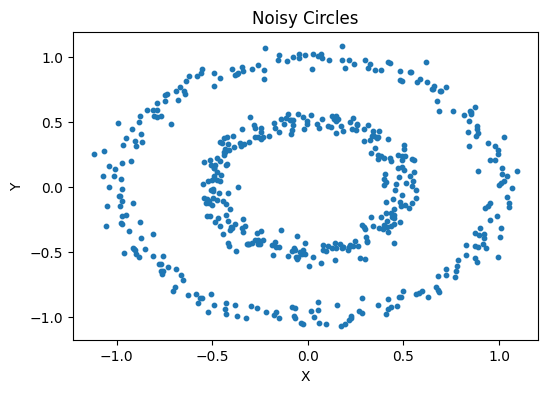

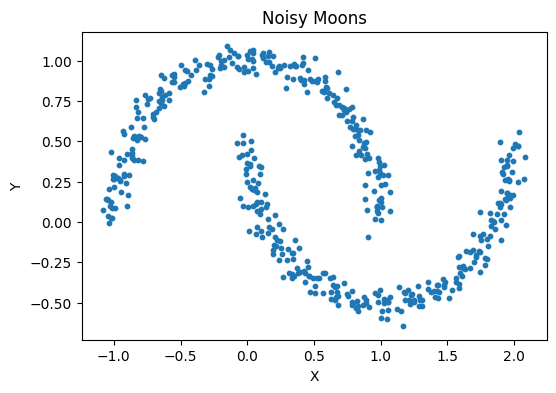

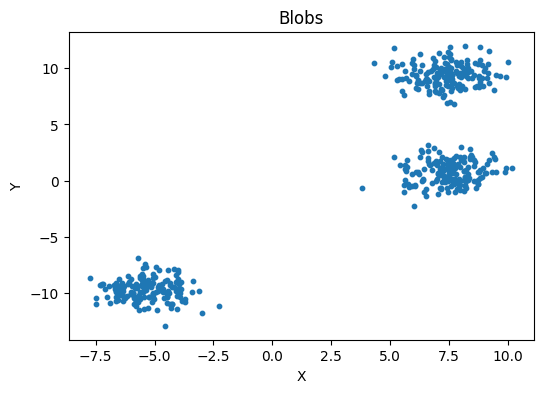

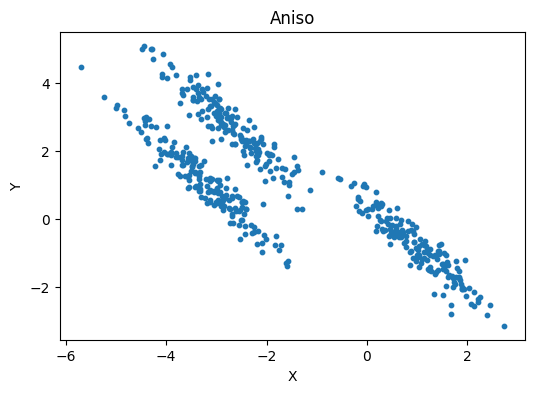

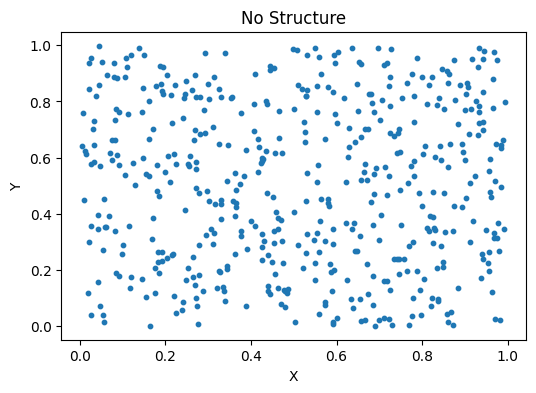

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


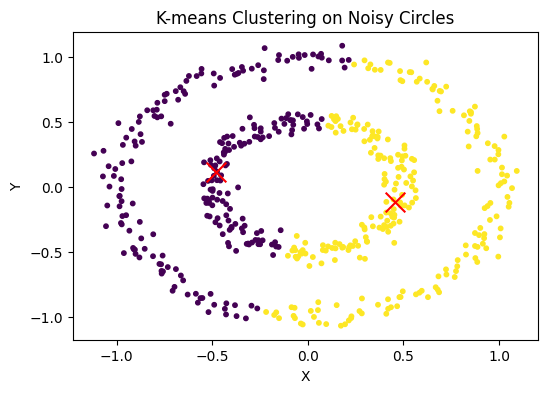

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


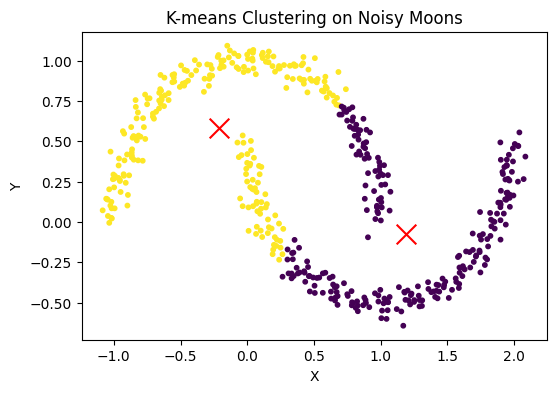

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


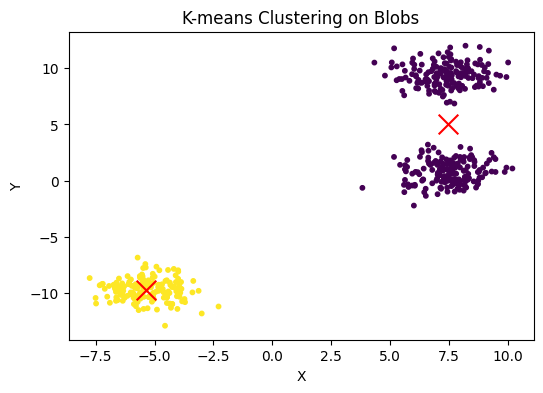

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


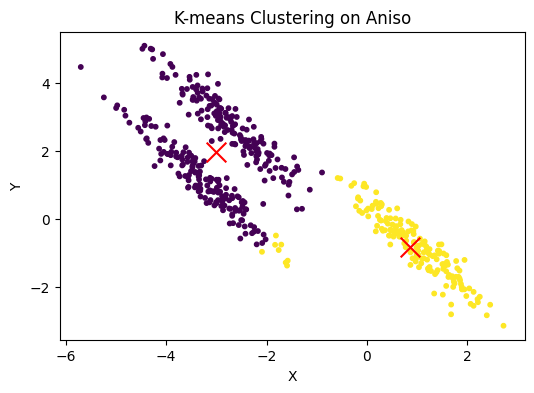

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


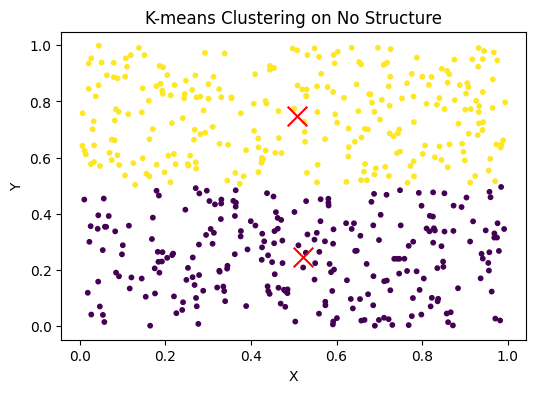

Dataset 1, EPS=0.1, Estimated number of clusters: 7, Silhouette score: 0.15


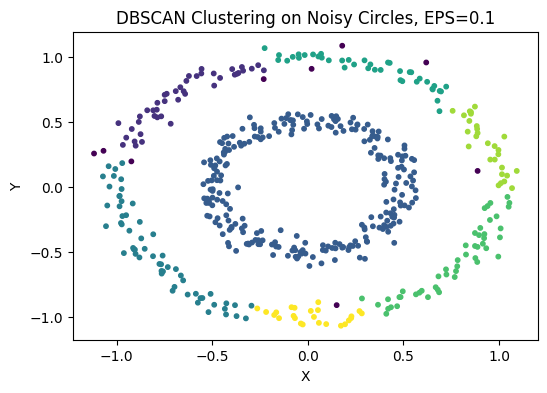

Dataset 1, EPS=0.5, Estimated number of clusters: 1, No valid silhouette score


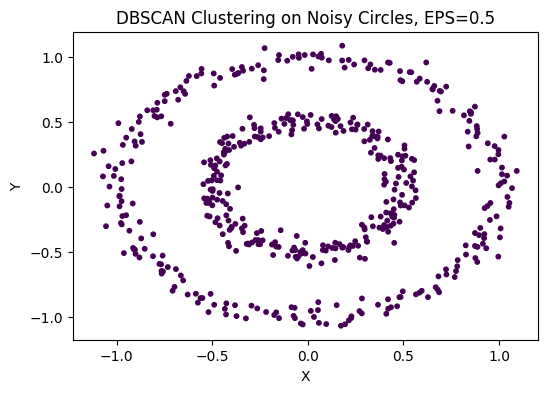

Dataset 1, EPS=1.0, Estimated number of clusters: 1, No valid silhouette score


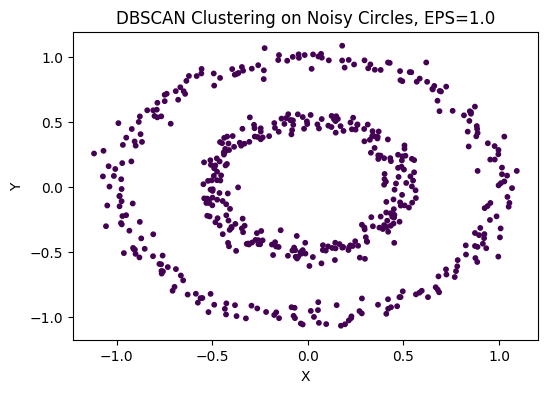

Dataset 2, EPS=0.1, Estimated number of clusters: 2, Silhouette score: 0.07


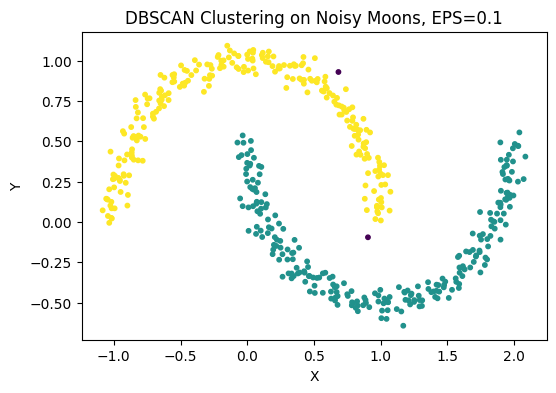

Dataset 2, EPS=0.5, Estimated number of clusters: 1, No valid silhouette score


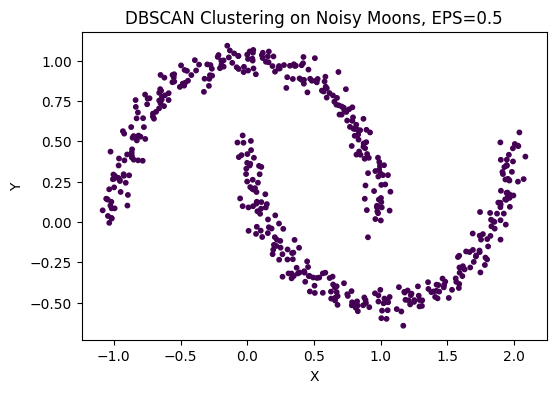

Dataset 2, EPS=1.0, Estimated number of clusters: 1, No valid silhouette score


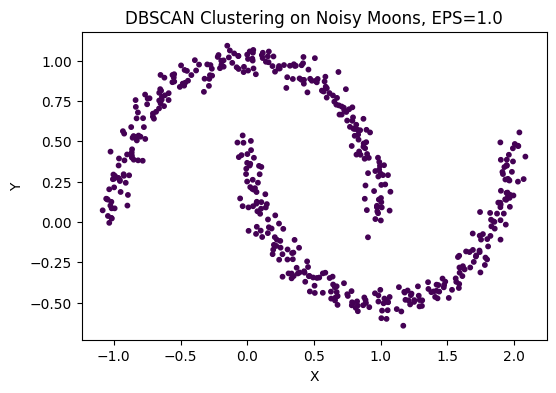

Dataset 3, EPS=0.1, Estimated number of clusters: 0, No valid silhouette score


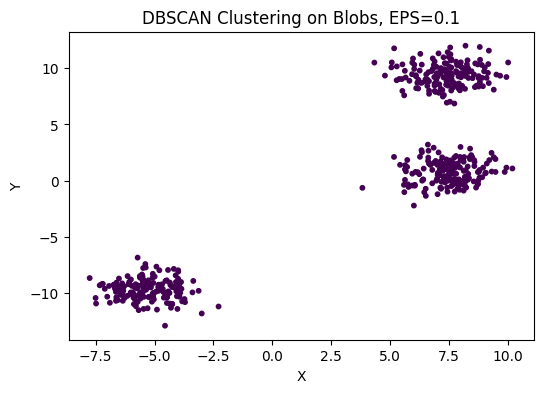

Dataset 3, EPS=0.5, Estimated number of clusters: 6, Silhouette score: 0.18


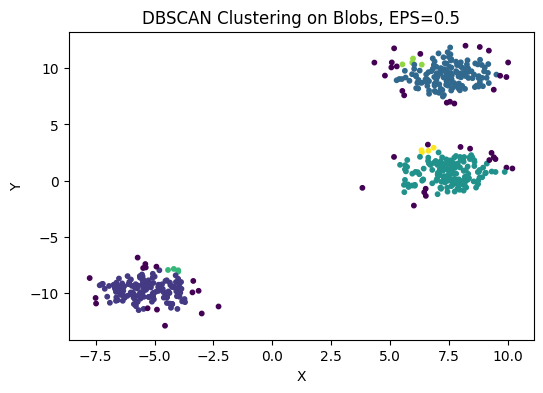

Dataset 3, EPS=1.0, Estimated number of clusters: 3, Silhouette score: 0.79


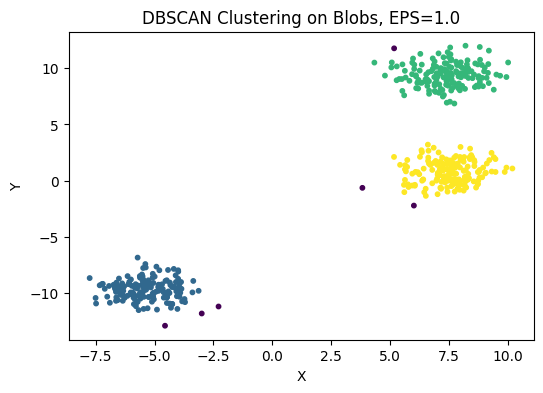

Dataset 4, EPS=0.1, Estimated number of clusters: 16, Silhouette score: -0.44


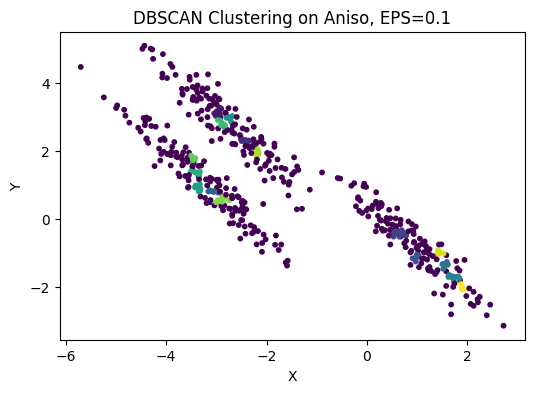

Dataset 4, EPS=0.5, Estimated number of clusters: 3, Silhouette score: 0.44


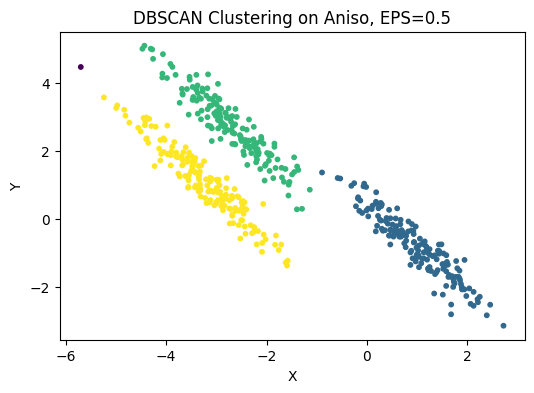

Dataset 4, EPS=1.0, Estimated number of clusters: 1, No valid silhouette score


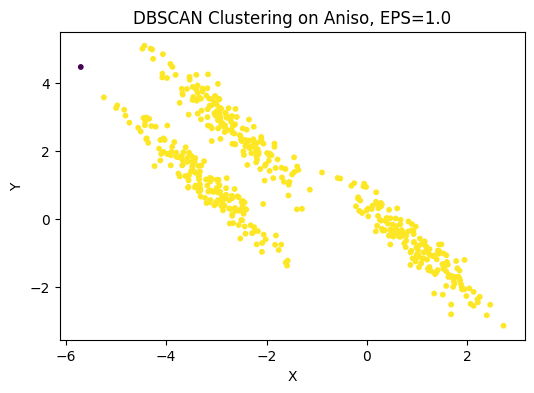

Dataset 5, EPS=0.1, Estimated number of clusters: 1, No valid silhouette score


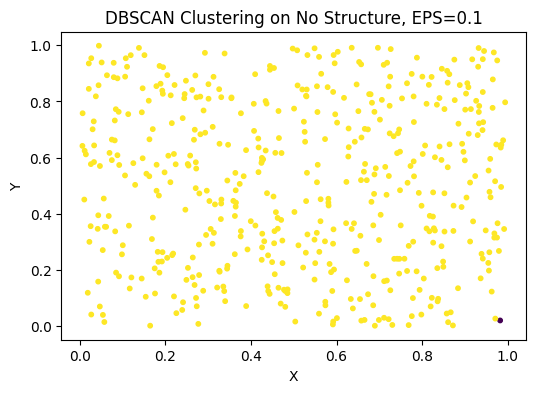

Dataset 5, EPS=0.5, Estimated number of clusters: 1, No valid silhouette score


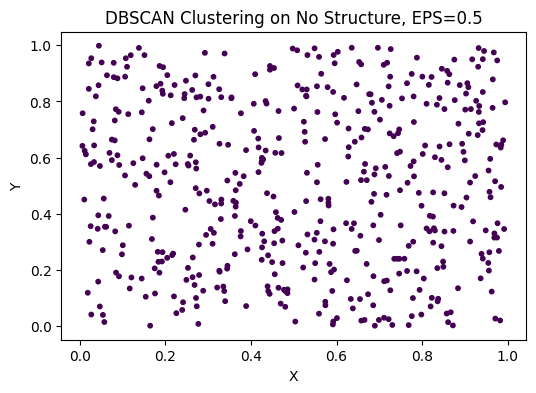

Dataset 5, EPS=1.0, Estimated number of clusters: 1, No valid silhouette score


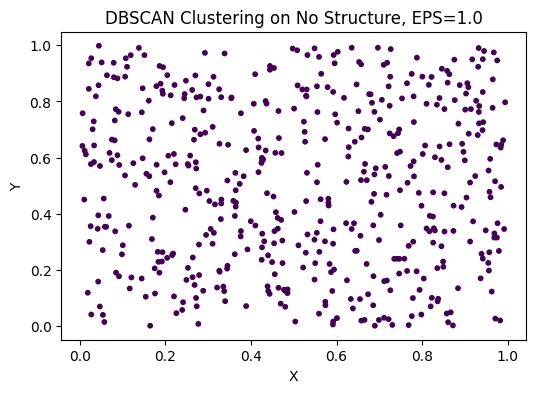

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Function to load datasets
def load_datasets():
    datasets = []
    noisy_circles = np.loadtxt('noisy_circles.txt')
    noisy_moons = np.loadtxt('noisy_moons.txt')
    blobs = np.loadtxt('blobs.txt')
    aniso = np.loadtxt('aniso.txt')
    no_structure = np.loadtxt('no_structure.txt')
    datasets.append((noisy_circles, 'Noisy Circles'))
    datasets.append((noisy_moons, 'Noisy Moons'))
    datasets.append((blobs, 'Blobs'))
    datasets.append((aniso, 'Aniso'))
    datasets.append((no_structure, 'No Structure'))
    return datasets

# Function to draw scatterplots
def draw_scatterplots(datasets):
    for i, (data, title) in enumerate(datasets):
        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1], s=10)
        plt.title(title)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

# Function to perform K-means clustering and visualize results
def kmeans_clustering(datasets):
    for i, (data, _) in enumerate(datasets):
        kmeans = KMeans(n_clusters=data.shape[1]).fit(data)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=10, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
        plt.title(f'K-means Clustering on {datasets[i][1]}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

# Function to perform DBSCAN clustering and visualize results
def dbscan_clustering(datasets):
    for i, (data, _) in enumerate(datasets):
        eps_values = [0.1, 0.5, 1.0]  # Adjust eps values for different datasets
        for eps in eps_values:
            dbscan = DBSCAN(eps=eps).fit(data)
            labels = dbscan.labels_
            unique_labels = np.unique(labels)
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            if n_clusters_ > 1:  # Check if there's more than one cluster
                silhouette_avg = silhouette_score(data, labels)
                print(f"Dataset {i+1}, EPS={eps}, Estimated number of clusters: {n_clusters_}, Silhouette score: {silhouette_avg:.2f}")
            else:
                print(f"Dataset {i+1}, EPS={eps}, Estimated number of clusters: {n_clusters_}, No valid silhouette score")
            plt.figure(figsize=(6, 4))
            plt.scatter(data[:, 0], data[:, 1], c=labels, s=10, cmap='viridis')
            plt.title(f'DBSCAN Clustering on {datasets[i][1]}, EPS={eps}')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()

# Main function
def main():
    datasets = load_datasets()
    draw_scatterplots(datasets)
    kmeans_clustering(datasets)
    dbscan_clustering(datasets)

if __name__ == "__main__":
    main()
